In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import normalize 
import nltk 
from sklearn.model_selection import train_test_split 
import time
import math

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
zip_codes_df = pd.read_excel('NYC ZIP CODES.xlsx')
zip_codes_list = list(zip_codes_df['zips 1'])

for i in range(1,10): 
    zip_codes_list.extend(list(zip_codes_df.iloc[:,i]))


In [3]:
zip_codes_list = [str(z)[0:3] for z in zip_codes_list if math.isnan(z) == False ]
zip_codes_list = list(set(zip_codes_list))
zip_codes_list


['104', '114', '116', '103', '110', '100', '101', '102', '113', '111', '112']

In [4]:
df = pd.read_csv('complaints-2021-03-09_14_52.csv')
df['Date received'] = pd.to_datetime(df['Date received'])
df['Year received'] = df['Date received'].dt.year
df = df[df['Year received'] != 2018]
print(len(df))

54651


In [5]:
#NYC ZIP CODES ONLY 
df['zip check'] = [z[0:3] for z in df['ZIP code']]
df = df.loc[df['zip check'].isin(zip_codes_list)]
df.drop(columns = 'zip check' , inplace = True) 
print(len(df))
df

31370


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year received
0,2019-07-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,11208,None,Consent not provided,Web,07/16/19,Closed with non-monetary relief,Yes,NaN,3307472,2019
2,2019-07-13,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,None,TD BANK US HOLDING COMPANY,NY,11232,None,Consent not provided,Web,07/29/19,Closed with non-monetary relief,Yes,NaN,3305374,2019
4,2019-04-04,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,None,"EQUIFAX, INC.",NY,11204,None,Consent not provided,Web,04/04/19,Closed with explanation,Yes,NaN,3201576,2019
6,2019-06-19,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,11225,None,Consent not provided,Web,06/19/19,Closed with explanation,Yes,NaN,3279897,2019
7,2019-04-16,"Payday loan, title loan, or personal loan",Personal line of credit,Getting a line of credit,None,NaN,Company believes it acted appropriately as aut...,"Happy Money, Inc.",NY,10065,None,Consent not provided,Web,04/16/19,Closed with explanation,No,NaN,3213397,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68479,2019-03-01,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,11003,None,Consent not provided,Web,03/01/19,Closed with non-monetary relief,Yes,NaN,3166200,2019
68480,2019-02-22,Checking or savings account,Savings account,Managing an account,Problem using a debit or ATM card,I had opened a saving acct on XX/XX/19 td bank...,None,TD BANK US HOLDING COMPANY,NY,112XX,None,Consent provided,Web,02/25/19,Closed with explanation,Yes,NaN,3159484,2019
68482,2019-03-12,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,NY,10469,None,Consent not provided,Web,03/12/19,Closed with explanation,Yes,NaN,3176637,2019
68485,2019-02-11,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Billing dispute for services,"On XX/XX/XXXX, I opened a loan account with Ne...",None,"Nelnet, Inc.",NY,103XX,None,Consent provided,Web,02/11/19,Closed with explanation,Yes,NaN,3148714,2019


In [6]:
text = df['Product'] + ' ' + df['Sub-product'] + ' ' + df['Issue'] + ' ' + df['Sub-issue']

In [7]:
train, test = train_test_split(text, test_size =0.25)

In [8]:
tf_idf_vectorizer = TfidfVectorizer(stop_words='english')
tf_idf = tf_idf_vectorizer.fit_transform(text)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [9]:
issues_df = pd.DataFrame(tf_idf_array,columns = tf_idf_vectorizer.get_feature_names())
train, test  = train_test_split(issues_df, test_size =0.25)

In [10]:
issues_df

,30,8am,9pm,abusive,accessing,account,action,activating,add,adding,...,want,wasn,wear,withdraw,withdrawals,won,work,working,written,wrong
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31365,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31366,0.0,0.0,0.0,0.0,0.0,0.534072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31367,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31368,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


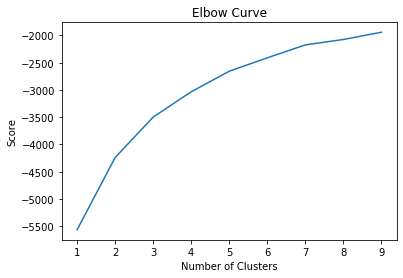

In [11]:
clusters = [KMeans(n_clusters=i) for i in range(1,10)]
objective_score = [k.fit(train).score(test) for k in clusters]

plt.plot(range(1,10),objective_score)
plt.xlabel("Number of Clusters")
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## How many Clusters Should be Chosen? 

In [12]:
#clusters = 6 
k = KMeans(n_clusters = 6)
predictions = k.fit_predict(issues_df)

In [13]:
df['Cluster'] = predictions

In [14]:
results_df = pd.DataFrame({'count':df.groupby(['Year received', 'Cluster']).size()}).reset_index()

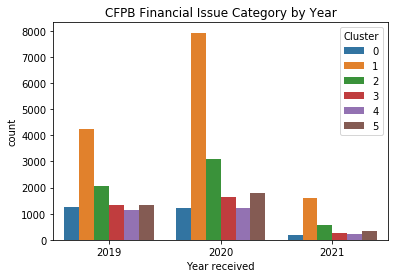

In [15]:
import seaborn as sns

plot = sns.barplot(data=results_df,x="Year received",y="count", hue = "Cluster" )
#plot.set_xticklabels(labels,rotation = 90);  
plot.set_title("CFPB Financial Issue Category by Year"); 

##  Looks like cluster 0 really spiked during 2020 Lets investigate further .....

### Cluster 0 

In [16]:
df[df['Cluster'] == 0]['Product'].unique() 

array(['Payday loan, title loan, or personal loan',
       'Vehicle loan or lease',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Student loan', 'Mortgage',
       'Money transfer, virtual currency, or money service',
       'Debt collection', 'Checking or savings account'], dtype=object)

In [17]:
df[df['Cluster'] == 0]['Sub-product'].unique()

array(['Personal line of credit', 'Loan', 'Credit reporting',
       'Private student loan', 'Federal student loan servicing',
       'Payday loan', 'Other type of mortgage',
       'Conventional home mortgage', 'International money transfer',
       'Foreign currency exchange', 'FHA mortgage',
       'Home equity loan or line of credit (HELOC)',
       'Private student loan debt', 'Lease', 'Mobile or digital wallet',
       'Credit repair services', 'I do not know',
       'Domestic (US) money transfer', 'Mortgage debt',
       'Virtual currency', 'Installment loan', 'Money order',
       'VA mortgage', 'Debt settlement', 'Federal student loan debt',
       "Traveler's check or cashier's check", 'Payday loan debt',
       'Title loan', 'Check cashing service', 'Reverse mortgage',
       'Other personal consumer report', 'Refund anticipation check',
       'Pawn loan'], dtype=object)

In [18]:
df[df['Cluster'] == 0]['Issue'].unique()

array(['Getting a line of credit',
       'Problems at the end of the loan or lease',
       'Credit monitoring or identity theft protection services',
       'Managing the loan or lease',
       'Dealing with your lender or servicer',
       "Charged fees or interest you didn't expect",
       'Trouble during payment process', 'Struggling to pay mortgage',
       'Closing on a mortgage', 'Struggling to repay your loan',
       'Other transaction problem', 'Fraud or scam',
       'Incorrect information on your report',
       'Applying for a mortgage or refinancing an existing mortgage',
       'Money was not available when promised',
       'Took or threatened to take negative or legal action',
       'Managing, opening, or closing your mobile wallet account',
       'Confusing or misleading advertising or marketing',
       'Getting a loan or lease', 'Improper use of your report',
       'Unauthorized transactions or other transaction problem',
       'Other service problem', 'Strugg

In [19]:
df[df['Cluster'] == 0]['Sub-issue'].unique()

array(['None', 'Problem while selling or giving up the vehicle',
       'Problem with product or service terms changing',
       'Problem with additional products or services purchased with the loan',
       'Received bad information about your loan',
       "Can't temporarily delay making payments",
       'Trouble with how payments are being handled',
       "Can't get other flexible options for repaying your loan",
       'Account status incorrect', 'Billing problem',
       'Threatened or suggested your credit would be damaged',
       'Excess mileage, damage, or wear fees, or other problem after the lease is finish',
       'Billing dispute for services',
       'Threatened to arrest you or take you to jail if you do not pay',
       'Problem lowering your monthly payments', 'Fraudulent loan',
       'Problem canceling credit monitoring or identify theft protection service',
       'Seized or attempted to seize your property',
       "Don't agree with the fees charged",
       'Re

### Cluster 1

In [20]:
df[df['Cluster'] == 1]['Product'].unique() 

array(['Credit reporting, credit repair services, or other personal consumer reports'],
      dtype=object)

In [21]:
df[df['Cluster'] == 1]['Sub-product'].unique()

array(['Credit reporting', 'Other personal consumer report',
       'Credit repair services'], dtype=object)

In [22]:
df[df['Cluster'] == 1]['Issue'].unique()

array(['Incorrect information on your report',
       'Improper use of your report',
       'Unable to get your credit report or credit score',
       'Credit monitoring or identity theft protection services',
       'Fraud or scam', 'Confusing or missing disclosures',
       'Problem with customer service', 'Unexpected or other fees'],
      dtype=object)

In [23]:
df[df['Cluster'] == 1]['Sub-issue'].unique()

array(['Information belongs to someone else',
       "Credit inquiries on your report that you don't recognize",
       'Reporting company used your report improperly',
       'Account information incorrect', 'Account status incorrect',
       'Problem getting your free annual credit report',
       'Public record information inaccurate',
       'Old information reappears or never goes away',
       'Personal information incorrect', 'Billing dispute for services',
       'Other problem getting your report or credit score',
       'Information is missing that should be on the report', 'None',
       'Information is incorrect',
       'Information that should be on the report is missing',
       "Didn't receive services that were advertised"], dtype=object)

## Cluster 2

In [24]:
df[df['Cluster'] == 2]['Product'].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Vehicle loan or lease', 'Checking or savings account'],
      dtype=object)

In [25]:
df[df['Cluster'] == 2]['Sub-product'].unique()

array(['Credit reporting', 'Lease', 'Other personal consumer report',
       'Personal line of credit', 'Loan',
       'Other banking product or service'], dtype=object)

In [26]:
df[df['Cluster'] == 2]['Issue'].unique()

array(["Problem with a credit reporting company's investigation into an existing problem",
       'Problem with fraud alerts or security freezes',
       "Problem with a company's investigation into an existing issue"],
      dtype=object)

In [27]:
df[df['Cluster'] == 2]['Sub-issue'].unique()

array(['Their investigation did not fix an error on your report',
       'Was not notified of investigation status or results',
       'Difficulty submitting a dispute or getting information about a dispute over the phone',
       'None', 'Problem with personal statement of dispute',
       'Investigation took more than 30 days'], dtype=object)

### Cluster 3

In [28]:
df[df['Cluster'] == 3]['Product'].unique()

array(['Credit card or prepaid card'], dtype=object)

In [29]:
df[df['Cluster'] == 3]['Sub-product'].unique()

array(['General-purpose credit card or charge card', 'Store credit card',
       'General-purpose prepaid card', 'Government benefit card',
       'Payroll card', 'Gift card'], dtype=object)

In [30]:
df[df['Cluster'] == 3]['Issue'].unique()

array(['Fees or interest',
       'Advertising and marketing, including promotional offers',
       'Getting a credit card', 'Other features, terms, or problems',
       'Problem with a purchase shown on your statement',
       'Problem when making payments', 'Improper use of your report',
       'Problem with a purchase or transfer', 'Trouble using the card',
       'Closing your account', 'Trouble using your card',
       'Incorrect information on your report',
       'Struggling to pay your bill', 'Unexpected or other fees',
       'Problem getting a card or closing an account', 'Advertising',
       'Credit monitoring or identity theft protection services',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Unable to get your credit report or credit score',
       'Problem with fraud alerts or security freezes',
       'Problem with overdraft', 'Problem with an overdraft'],
      dtype=object)

### Cluster 4

In [31]:
df[df['Cluster'] == 4]['Product'].unique()

array(['Checking or savings account'], dtype=object)

In [32]:
df[df['Cluster'] == 4]['Sub-product'].unique()

array(['Checking account', 'Other banking product or service',
       'Savings account', 'CD (Certificate of Deposit)'], dtype=object)

In [33]:
df[df['Cluster'] == 4]['Issue'].unique()

array(['Managing an account', 'Opening an account',
       'Problem with a lender or other company charging your account',
       'Problem caused by your funds being low',
       'Incorrect information on your report', 'Closing an account',
       'Credit monitoring or identity theft protection services',
       'Problem with fraud alerts or security freezes',
       "Problem with a credit reporting company's investigation into an existing problem"],
      dtype=object)